Sensitivity analysis.ipynb


# Data

In [1]:
import data_preparation
import custom_func
import model
import model_analysis

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Import data
spill_data = pd.read_excel('Inputs/data_100_oil_spills.xlsx', sheet_name='spills', header=0).copy()
current_station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current', header=0).copy()
current_input_param = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current input param', header=0).copy()


potential_station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
potential_station_data = potential_station_data.iloc[[0, 4,7, 10, 11, 18]] # if we want to keep current facility setup in the set of proposed facilities
input_parameters = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='Estimated parameters', header=0).copy()
sensitivity_dataR = gpd.read_file('Inputs/ArcGIS_data/Sensitivity_data/Sensitivity_data5.shp').copy()

## Data Extraction

In [3]:
coordinates_st = custom_func.extract_station_coordinate(current_station_data)
current_st_coord = pd.DataFrame(coordinates_st[1]).T.reset_index().set_index('index')
current_st_coord.columns = ['St_Latitude', 'St_Longitude']
display(current_st_coord)


coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
spill_coord = pd.DataFrame(coordinates_spill[1]).T.reset_index().set_index('index')
spill_coord.columns = ['St_Latitude', 'St_Longitude']
display(spill_coord)

,St_Latitude,St_Longitude
index,,
s6,60.758053,-115.789886
s9,58.550838,-93.623520
s200,69.459000,-132.974304
s300,63.742886,-68.464958


,St_Latitude,St_Longitude
index,,
o74,64.504219,-79.406021
o98,73.858727,-77.062927
o53,58.851135,-94.206932
o178,69.455536,-123.856422
o203,65.388885,-65.952179
...,...,...
o207,61.278797,-114.416603
o43,70.589783,-120.206131
o192,68.705536,-134.233826


## Common input parameters

In [4]:
BigM = 10**20
current_vs_proposed = 'proposed' # current
MaxFO = 1
Budget = 10**12
W = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
QuantityMin = 2

# Model Configuration 3 (Current facility location)


## Input parameters

In [5]:
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(current_station_data, spill_data, current_input_param)

#max(Distance.values())
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

['s6', 's9', 's200', 's300']


## Fig8(a) Network diagram of current facility

In [6]:
current_vs_proposed = 'current'
NumberStMax_m3 = 6
DistanceMax = 10

In [7]:
# Modeling based on current setup
model_03, select_m3, deploy_m3, mvars_m3, names_m3, values_m3, \
        spill_df_m3, station_df_m3, cover_1s_m3, select_1s_m3, deploy_1s_m3, MeanResponseTime_m3, coverage_percentage_m3, assignment_m3  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m3, Distance, Distance_n,
          W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
          BigM, MaxFO)

--------------MIP-moo--------
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-04
cover
{('o53', 's9'): <gurobi.Var *Awaiting Model Update*>, ('o178', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o203', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o7', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o221', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o64', 's9'): <gurobi.Var *Awaiting Model Update*>, ('o25', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o94', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o208', 's6'): <gurobi.Var *Awaiting Model Update*>, ('o86', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o93', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o6', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o10', 's300'): <gurobi.Var *Awaiting Model Update*>, ('o169', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o185', 's200'): <gurobi.Var *Awaiting Model Update*>, ('o87', 's300'): <gurobi.Var *Awaiting Model Upda

In [8]:
current_vs_proposed = 'current'

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o178,s200,69.459000,-132.974304,69.455536,-123.856422,c,110.0,9.117882
1,o221,s200,69.459000,-132.974304,68.962257,-136.552292,i,157.0,3.612305
2,o25,s200,69.459000,-132.974304,69.626266,-138.875046,c,31.0,5.903112
3,o169,s200,69.459000,-132.974304,70.624878,-124.072258,i,37.0,8.978068
4,o185,s200,69.459000,-132.974304,69.951424,-132.673172,i,157.0,0.577202
5,o24,s200,69.459000,-132.974304,71.026360,-127.767967,i,7.0,5.437146
6,o175,s200,69.459000,-132.974304,69.407196,-123.965919,i,37.0,9.008534
7,o28,s200,69.459000,-132.974304,69.807663,-140.962463,c,31.0,7.995765
8,o27,s200,69.459000,-132.974304,69.721138,-139.684113,c,31.0,6.714927
9,o219,s200,69.459000,-132.974304,69.517181,-138.171616,i,7.0,5.197637


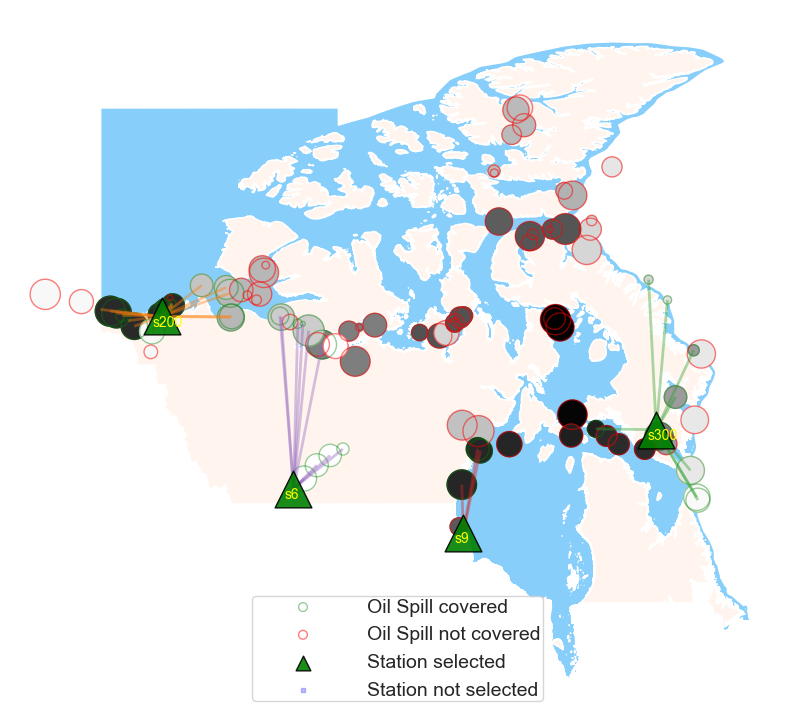

In [9]:
model_analysis.draw_network_diagram(DistanceMax, NumberStMax_m3, Sensitivity_R, spill_df_m3, station_df_m3, MeanResponseTime_m3, coverage_percentage_m3, assignment_m3, deploy_1s_m3, select_1s_m3, current_vs_proposed)

# Model Configuration 4 (Proposed 5 facility location)

## Input param

In [10]:
NumberStMax_m4 = 5
current_vs_proposed = 'proposed'

In [11]:
coordinates_potential_st = custom_func.extract_station_coordinate(potential_station_data)
potential_st_coord = pd.DataFrame(coordinates_potential_st[1]).T.reset_index().set_index('index')
potential_st_coord.columns = ['St_Latitude', 'St_Longitude']
display(potential_st_coord)

,St_Latitude,St_Longitude
index,,
s1,70.000000,-134.000000
s5,60.529999,-114.379997
s8,60.060001,-95.889999
s11,62.669998,-92.708000
s12,73.400002,-88.160004
s19,63.150002,-69.680000


In [12]:
# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

['s1', 's5', 's8', 's11', 's12', 's19']


In [13]:
# Model
model_04, select_m4, deploy_m4, mvars_m4, names_m4, values_m4, \
        spill_df_m4, station_df_m4, cover_1s_m4, select_1s_m4, deploy_1s_m4, MeanResponseTime_m4, coverage_percentage_m4, assignment_m4  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m4, Distance, Distance_n,
          W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
          BigM, MaxFO)

--------------MIP-moo--------
cover
{('o74', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's8'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's11'): <gurobi.Var *Awaiting Model Update*>, ('o203', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o127', 's12'): <gurobi.Var *Awaiting Model Update*>, ('o51', 's12'): <gurobi.Var *Awaiting Model Update*>, ('o7', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o30', 's1'): <gurobi.Var *Awaiting Model Update*>, ('o221', 's1'): <gurobi.Var *Awaiting Model Update*>, ('o64', 's8'): <gurobi.Var *Awaiting Model Update*>, ('o64', 's11'): <gurobi.Var *Awaiting Model Update*>, ('o25', 's1'): <gurobi.Var *Awaiting Model Update*>, ('o94', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o119', 's12'): <gurobi.Var *Awaiting Model Update*>, ('o148', 's5'): <gurobi.Var *Awaiting Model Update*>, ('o208', 's5'): <gurobi.Var *Awaiting Model Update*>, ('o86', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o93', 's19'): <gurobi.Var *Awaiting Model Upd

## Fig8(b) Network diagram of proposed 5 facility

H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


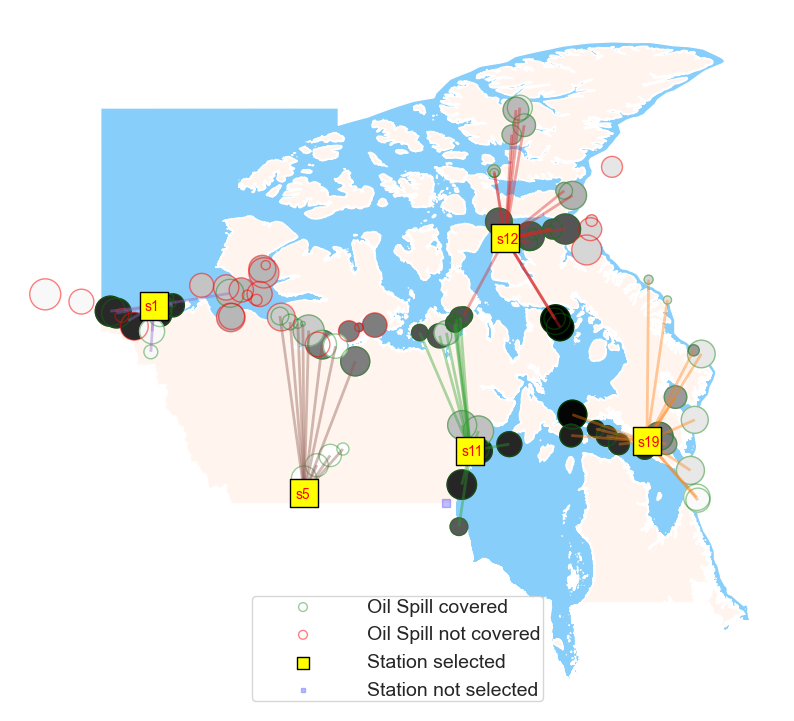

In [14]:
# Draw the network
assignment_line = model_analysis.draw_network_diagram(DistanceMax, NumberStMax_m4, Sensitivity_R, spill_df_m4, station_df_m4, MeanResponseTime_m4, coverage_percentage_m4, assignment_m4, deploy_1s_m4, select_1s_m4, current_vs_proposed)

# Compare Model 3 & 4

In [34]:
assignment_line_m3 = pd.DataFrame(columns=list(assignment_m3.columns.values))
for i, o in enumerate(assignment_m3['Spill #'].unique()):
    minD = min(assignment_m3.loc[assignment_m3['Spill #'] == o]['Distance'])
    df = assignment_m3.iloc[np.where(assignment_m3['Distance'] == minD)[0]]
    assignment_line_m3 = pd.concat([assignment_line_m3, df])

resource_allocation_m3 = assignment_line_m3[['Station no.', 'Resource Type', 'Quantity deployed']]
resource_allocation_m3 = resource_allocation_m3.sort_values(by=['Station no.'])
resource_allocation_m3 = resource_allocation_m3.groupby(['Station no.', 'Resource Type'])['Quantity deployed'].mean().reset_index()
resource_allocation_m3['Facility'] = 'Current'
resource_allocation_m3

,Station no.,Resource Type,Quantity deployed,Facility
0,s200,c,34.857143,Current
1,s200,i,61.000000,Current
2,s300,c,57.333333,Current
3,s300,i,67.000000,Current
4,s6,c,13.666667,Current
5,s6,i,79.857143,Current
6,s9,c,31.000000,Current
7,s9,i,22.000000,Current


In [35]:
assignment_line_m4 = pd.DataFrame(columns=list(assignment_m4.columns.values))
for i, o in enumerate(assignment_m4['Spill #'].unique()):
    minD = min(assignment_m4.loc[assignment_m4['Spill #'] == o]['Distance'])
    df = assignment_m4.iloc[np.where(assignment_m4['Distance'] == minD)[0]]
    assignment_line_m4 = pd.concat([assignment_line_m4, df])

resource_allocation_m4 = assignment_line_m4[['Station no.', 'Resource Type', 'Quantity deployed']]
resource_allocation_m4 = resource_allocation_m4.sort_values(by=['Station no.'])
resource_allocation_m4 = resource_allocation_m4.groupby(['Station no.', 'Resource Type'])['Quantity deployed'].mean().reset_index()
resource_allocation_m4['Facility'] = 'Proposed'
resource_allocation_m4

,Station no.,Resource Type,Quantity deployed,Facility
0,s1,c,70.500000,Proposed
1,s1,i,17.000000,Proposed
2,s11,c,48.666667,Proposed
3,s11,i,67.000000,Proposed
4,s11,m,31.000000,Proposed
5,s12,c,44.250000,Proposed
6,s12,i,55.750000,Proposed
7,s12,m,51.000000,Proposed
8,s19,c,46.142857,Proposed
9,s19,i,27.000000,Proposed


## Fig7a barplot - quantity stockplie

In [36]:
resource_allocation = pd.concat([resource_allocation_m3, resource_allocation_m4])
resource_allocation

,Station no.,Resource Type,Quantity deployed,Facility
0,s200,c,34.857143,Current
1,s200,i,61.000000,Current
2,s300,c,57.333333,Current
3,s300,i,67.000000,Current
4,s6,c,13.666667,Current
5,s6,i,79.857143,Current
6,s9,c,31.000000,Current
7,s9,i,22.000000,Current
0,s1,c,70.500000,Proposed
1,s1,i,17.000000,Proposed


<BarContainer object of 21 artists>

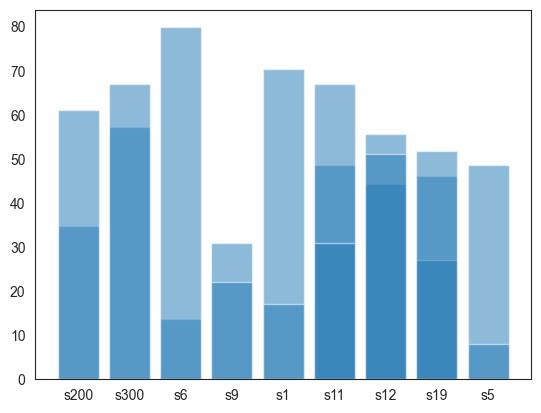

In [45]:
plt.bar(data=resource_allocation,
        x="Station no.", height="Quantity deployed",
        alpha = 0.5,
        )
#plt.legend(loc='upper right')

In [51]:
resource_allocation.to_csv('Outputs/resource_allocation.csv')

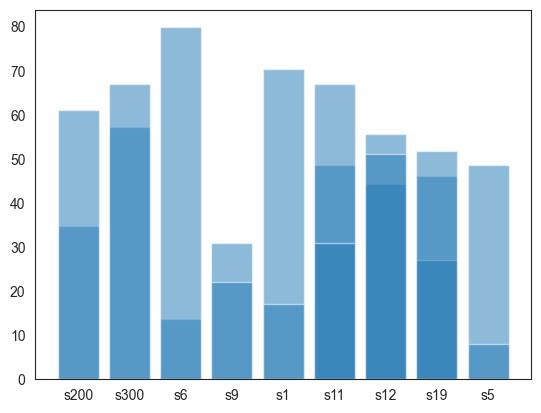

In [50]:
fig_barplot = plt.figure()
plt.bar(data=resource_allocation,
        x="Station no.", height="Quantity deployed",
        alpha = 0.5,
        )

plt.show()
fig_barplot.savefig('Outputs/barplot_compare.png', transparent=False, dpi= 600)


In [56]:
import seaborn as sns
%matplotlib inline
resource_allocation_df = pd.read_csv('Outputs/resource_allocation.csv', index_col='Station no.')
resource_allocation_df

,Unnamed: 0,Resource Type,Quantity deployed,Facility
Station no.,,,,
s200,0,c,34.857143,Current
s200,1,i,61.000000,Current
s200,2,m,0.000000,Current
s300,3,c,57.333333,Current
s300,4,i,67.000000,Current
s300,5,m,0.000000,Current
s6,6,c,13.666667,Current
s6,7,i,79.857143,Current
s6,8,m,0.000000,Current


ValueError: The number of FixedLocator locations (27), usually from a call to set_ticks, does not match the number of labels (9).

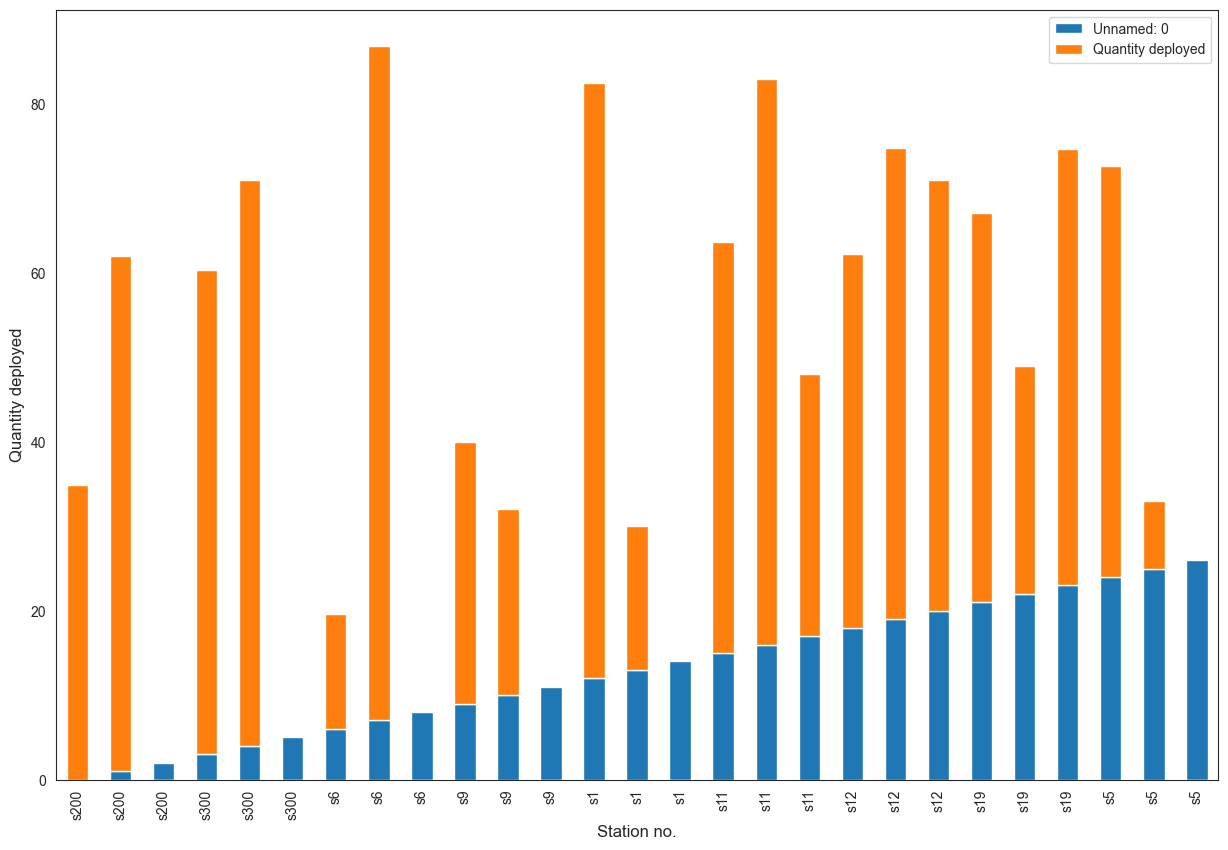

In [58]:
_, ax = plt.subplots(figsize=(15, 10))

# Plot our bar chart with stacked values
labels_days_of_week = ['s200', 's1', 's6', 's5', 's300', 's19', 's9', 's11', 's12']
resource_allocation_df.plot(kind="bar", stacked=True, ax=ax)

# Customize labels
ax.set_ylabel('Quantity deployed', size=12)
ax.set_xlabel('Station no.', size=12)
ax.set_xticklabels(labels_days_of_week)

# Change labels of columns to the displayed as legend
# This assigns b -> Breakfast, l -> Lunch and d -> Dinner as our data is ordered this way in the csv
labels_legend = ['m', 'c', 'i']
ax.legend(labels=labels_legend)

plt.show()

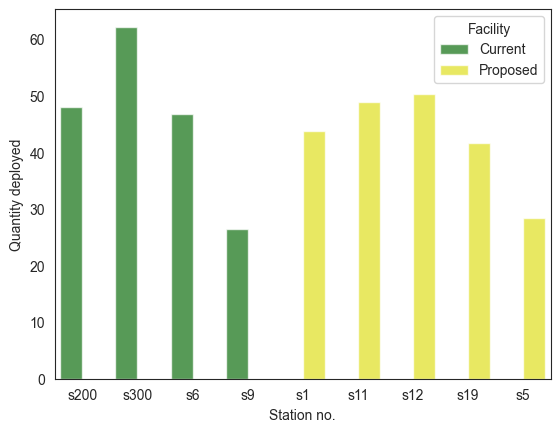

In [38]:
fig = plt.figure()
ax = sns.barplot(data=resource_allocation,
                 x="Station no.", y="Quantity deployed", errorbar=None,
                 hue='Facility', palette=["g", "yellow"],
                 alpha=0.7)
#sns.set_style(style='white')
ax.grid(False)
plt.show() #, ls='Resource Type'
fig.savefig('Outputs/barplot_compare.png', transparent=True)

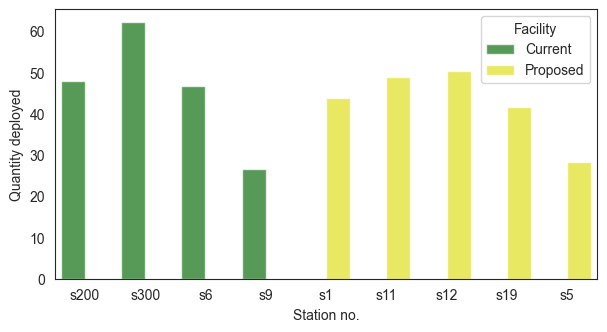

In [39]:
fig10c = plt.subplots(figsize=(7,3.5))
ax = sns.barplot(data=resource_allocation,
                 x="Station no.", y="Quantity deployed", errorbar=None,
                 hue='Facility', palette=["g", "yellow"],
                 alpha=0.7)
sns.set_style(style='white')
ax.grid(False)
plt.savefig('Outputs/barplot_compareHatch.png', transparent=True)

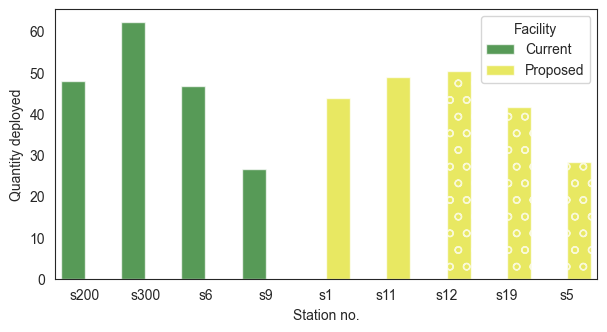

In [40]:
fig10c = plt.subplots(figsize=(7,3.5))
ax = sns.barplot(data=resource_allocation,
                 x="Station no.", y="Quantity deployed", errorbar=None,
                 hue='Facility', palette=["g", "yellow"],
                 alpha=0.7)
hatches = ['', '', '', '', '', 'o','o', 'o','','','', '', '', '', '', 'o','o', 'o']
# Loop over the bars
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])
sns.set_style(style='white')
ax.grid(False)
plt.savefig('Outputs/barplot_compareHatch.png', transparent=True)

In [22]:
ax.patches

<Axes.ArtistList of 12 patches>

## Fig7b Boxplot - compare coverage, cost, time for current vs proposed

In [23]:
data_compare = pd.read_excel('Outputs/current vs proposed.xlsx', skiprows=[0])

data_compare.info()
coverage_df_stacked = data_compare[['Current','Proposed']].copy().stack().reset_index()
coverage_df_stacked.columns = ['Index','Facility','Coverage']
cost_df_stacked = data_compare[['Current.1','Proposed.1']].copy().stack().reset_index()
cost_df_stacked.columns = ['Index','Facility','Cost']

time_df_stacked = data_compare[['Current.2','Proposed.2']].copy().stack().reset_index()
time_df_stacked.columns = ['Index','Facility','Response Time']


FileNotFoundError: [Errno 2] No such file or directory: 'Outputs/current vs proposed.xlsx'

In [ ]:
def draw_boxplot(data, y, ax):
    sns.violinplot(data= data,x='Facility', y=y, alpha = 0.5)
    sns.stripplot(data= data, x='Facility', y=y)
    plt.ylabel = y


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
draw_boxplot(coverage_df_stacked, 'Coverage', ax1)
draw_boxplot(cost_df_stacked, 'Cost', ax2)
draw_boxplot(time_df_stacked, 'Response Time', ax3)

plt.show()
fig.savefig('Outputs/boxplot_{}.png', transparent=True)

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3]
plt.rcParams['axes.edgecolor'] = 'lightgray'
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

sns.boxplot(data= coverage_df_stacked, ax=ax1, x='Facility', y='Coverage',
            boxprops=dict(alpha=.3), palette=["g", "yellow"])
sns.stripplot(data= coverage_df_stacked, ax=ax1, x='Facility', y='Coverage',
              alpha=.3)


sns.boxplot(data= cost_df_stacked, ax=ax2, x='Facility', y='Cost',
            boxprops=dict(alpha=.3), palette=["g", "yellow"])
sns.stripplot(data= cost_df_stacked, ax=ax2, x='Facility', y='Cost',
              alpha=.3)
sns.boxplot(data= time_df_stacked, ax=ax3, x='Facility', y='Response Time',
            boxprops=dict(alpha=.3), palette=["g", "yellow"])
sns.stripplot(data= time_df_stacked, ax=ax3, x='Facility', y='Response Time',
              alpha=.3)
plt.tight_layout()

#plt.axis('off')
# plt.xlabel('')
plt.show()
fig.savefig('Outputs/boxplot.png', transparent=True)

# Model Configuration 5 (Proposed 6 facility location)

In [ ]:
NumberStMax = 6

## Fig8(b) Network diagram of proposed 5 facility

# Multiscene

## grbtool

In [ ]:
# grblogtool
# !pip install grblogtools
import grblogtools as glt
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:

results = glt.parse(["Outputs/Logfiles/model_moo*.log"])
summary = results.summary()
summary.columns

summary = summary[['Runtime','ObjVal', 'ObjBound', 'RelaxObj', 'IterCount']].dropna()
glt.plot(summary.sort_values(by="Runtime"),
         type="bar",
         color="Log")

progress_iteration = results.progress("nodelog")
display(progress_iteration.columns)
progress_iteration[['LogFilePath', 'Incumbent', 'BestBd', 'Gap']]

results.progress("rootlp")

glt.plot(summary.sort_values(by="Runtime"), #
         x = "IterCount", y = "ObjVal", type="scatter",
         color="LogFilePath",
         log_x=True,
         title="Gurobi Performance")

glt.plot(timelines[timelines["Log"]=="model_moo(Mar 01,2217)"], type='line', y='Gap', color='Seed')
glt.plot(summary, x= 'Time', y='Gap', color='Seed', type="line")